# CSC 6850: Semi-supervised learning Project

## 1. The Data

The project requires the use of 10,000 samples for training with 1000 examples from each class. In addition, only consider 10 labeled samples from every class and treat the rest of the samples as unlabeled.

Information about dataset used for purposes of this project:

MNIST is a subset of a larger set available from NIST at http://yann.lecun.com/exdb/mnist/. It contains a training set of 60,000 examples and a test set of 10,000 examples.
Four files are available:

    train-images-idx3-ubyte.gz: training set images (9912422 bytes)
    train-labels-idx1-ubyte.gz: training set labels (28881 bytes)
    t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)
    t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes)

Due to access issues with Kaggle, the dataset copy can also be found at: https://www.kaggle.com/datasets/hojjatk/mnist-dataset/

In [24]:
import numpy as np
from digits import get_mnist
import matplotlib.pyplot as plt

In [16]:
# Function to access data files for MNIST digits folder - from homework 3 source code
def get_mnist_samples(train_num=10000, test_num=10000):
    trX, trY, tsX, tsY = get_mnist()
    #Shuffle the data.
    tr_idx = np.random.choice(trX.shape[0], train_num)
    trX = trX[tr_idx]
    trY = trY[tr_idx]
    ts_idx = np.random.choice(tsX.shape[0], test_num)
    tsX = tsX[ts_idx]
    tsY = tsY[ts_idx]
    # Reshape to [n x m]. n dimensions and m samples
    trX = trX.reshape(-1, 28*28).T
    trY = trY.reshape(1, -1)
    tsX = tsX.reshape(-1, 28*28).T
    tsY = tsY.reshape(1, -1)
    return trX, trY, tsX, tsY

In [20]:
# Download data and use random seed for reproducibility
np.random.seed(1)
trX, trY, tsX, tsY = get_mnist_samples(train_num=5000, test_num=10000)

In [21]:
# Checking content dimensions
print('trX.shape: ', trX.shape)
print('trY.shape: ', trY.shape)
print('tsX.shape: ', tsX.shape)
print('tsY.shape: ', tsY.shape)

trX.shape:  (784, 5000)
trY.shape:  (1, 5000)
tsX.shape:  (784, 10000)
tsY.shape:  (1, 10000)



Displaying samples
Correct labels for examples
[[0 9 0 5 0 7 0 0 5 6]
 [0 5 4 4 6 7 3 0 9 7]
 [8 8 8 7 6 2 2 1 9 6]
 [8 1 7 2 0 3 5 2 7 6]
 [1 0 6 3 8 0 4 1 5 5]
 [9 7 1 3 2 1 8 1 3 7]
 [2 9 5 8 5 8 0 1 5 4]
 [9 1 8 4 6 1 9 4 7 9]
 [3 9 9 7 8 3 7 4 7 0]
 [6 6 1 6 9 8 9 8 4 0]]

Corresponding images


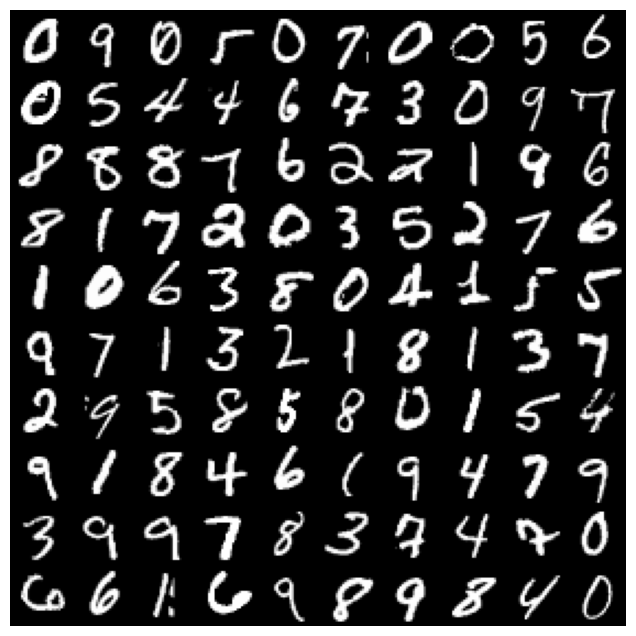

In [26]:
# Example content
print('\nDisplaying samples')
visx = np.concatenate((trX[:,:50],tsX[:,:50]), axis=1).reshape(28,28,10,10).transpose(2,0,3,1).reshape(28*10,-1)
visy = np.concatenate((trY[:,:50],tsY[:,:50]), axis=1).reshape(10,-1)
print('Correct labels for examples')
print(visy)

# Visualization via matplotlib of digits dataset and showing same content as labels
print('\nCorresponding images')
plt.figure(figsize = (8,8))
plt.axis('off')
plt.imshow(visx, cmap='gray')

## 2. The Classifier

- Use of a 2-layer neural network with ReLU activations [784, 200, 10].
- The input is vectorized MNIST image with 784 dimensions.
- The hidden layer has 200 dimensions.
- The ouput has 10 dimensions for the 10 digit categories.

In [ ]:
'''
Computes the Rectified Linear (ReLu) activation function which returns 0 if the input
is negative, otherwise, it returns the input as is
Input: Z -> a torch tensor of (n,m) dimensions = 'm' samples with 'n' dimensions
Output: A -> 
'''
def relu_activation(Z):


## 3. Toy dataset

After creating the algorithm to perform the classification, a toy dataset from two-moons Toy-dataset at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html must be created. Do the following:
- Consider 3 labelled examples each from the two categories.
- Treat the rest of the data as unlabelled.
- Display the decision boundaries using the semi-supervised learning algorithms listed below:

    - Baseline
    - Entropy Minimization
    - Pseudo Label
    - Virtual Adversarial Training
    - My pseudo label

- Use a 2 layer network with sigmoid activations as the classifier, i.e. [2, 10, 2].
- The input is 2 dimensions, hidden layer is 10-dimensions, and the output is 2 categories.
- Compare 3 algorithms with the baseline supervised learning (train with only the labeled data).
